## Import Libraries

In [1]:
import os
import pandas as pd
import neurokit2 as nk

# Constants
sampling_rate = 1000
data_folder = './rest_data'

In [3]:
# Get all parquet files
parquet_files = [f for f in os.listdir(data_folder) if f.endswith('.parquet')]
print(f"Found {len(parquet_files)} parquet files to process\n")

Found 64 parquet files to process



# Quality control using Neurokit2

In [7]:
# Process all ECG files in parallel using joblib
from joblib import Parallel, delayed

def process_ecg_file(filename, data_folder, sampling_rate):
    """Process a single ECG file and return quality metrics"""
    print(f"Processing: {filename}")
    
    # Extract subject number
    subject_num = int(filename.split('_')[0].replace('sub-', ''))
    
    filepath = os.path.join(data_folder, filename)
    data = pd.read_parquet(filepath)
    ecg_signal = data['ECG']
    
    # Process ECG
    signals, info = nk.ecg_process(ecg_signal, sampling_rate=sampling_rate)
    
    # Clean signal and get R-peaks for quality assessment
    ecg_cleaned = nk.ecg_clean(ecg_signal, sampling_rate=sampling_rate)
    rpeaks = info['ECG_R_Peaks']
    
    # Calculate ECG quality
    quality_score = nk.ecg_quality(ecg_cleaned, rpeaks=rpeaks, sampling_rate=sampling_rate, method='averageQRS')
    
    # Convert to scalar if it's an array
    if hasattr(quality_score, '__len__'):
        quality_score = float(quality_score[0]) if len(quality_score) > 0 else float(quality_score)
    else:
        quality_score = float(quality_score)
    
    result = {
        'subject': subject_num,
        'quality': quality_score,
        'filename': filename,
        'mean_hr': signals['ECG_Rate'].mean(),
        'n_rpeaks': len(rpeaks)
    }
    
    print(f"  ✅ {filename} - HR: {result['mean_hr']:.1f} bpm, Quality: {quality_score:.3f}\n")
    
    return result



# Process in parallel using all available cores (n_jobs=-1)
results = Parallel(n_jobs=-1, verbose=10)(
    delayed(process_ecg_file)(filename, data_folder, sampling_rate) 
    for filename in parquet_files
)

# Create quality DataFrame from results
quality = pd.DataFrame(results)[['subject', 'quality']]
quality = quality.sort_values('subject').reset_index(drop=True)

print("\nAll files processed!")
print(f"Total subjects: {len(results)}")
print("\nQuality DataFrame:")
display(quality)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Processing: sub-035_task-rest_ecg_rest.parquet
Processing: sub-032_task-rest_ecg_rest.parquet
Processing: sub-033_task-rest_ecg_rest.parquet
Processing: sub-036_task-rest_ecg_rest.parquet
Processing: sub-039_task-rest_ecg_rest.parquet
Processing: sub-042_task-rest_ecg_rest.parquet
Processing: sub-034_task-rest_ecg_rest.parquet
Processing: sub-040_task-rest_ecg_rest.parquet
Processing: sub-043_task-rest_ecg_rest.parquet
Processing: sub-044_task-rest_ecg_rest.parquet
Processing: sub-041_task-rest_ecg_rest.parquet
Processing: sub-038_task-rest_ecg_rest.parquet
Processing: sub-044_task-rest_ecg_rest.parquet
Processing: sub-041_task-rest_ecg_rest.parquet
Processing: sub-038_task-rest_ecg_rest.parquet
  ✅ sub-042_task-rest_ecg_rest.parquet - HR: 84.8 bpm, Quality: 0.685

  ✅ sub-040_task-rest_ecg_rest.parquet - HR: 93.7 bpm, Quality: 0.552

  ✅ sub-033_task-rest_ecg_rest.parquet - HR: 79.3 bpm, Quality: 0.000

Processing: sub-045_task-rest_ecg_rest.parquet
  ✅ sub-038_task-rest_ecg_rest.parq

[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.0s


Processing: sub-050_task-rest_ecg_rest.parquet
  ✅ sub-035_task-rest_ecg_rest.parquet - HR: 76.6 bpm, Quality: 0.925

  ✅ sub-043_task-rest_ecg_rest.parquet - HR: 88.0 bpm, Quality: 0.067

  ✅ sub-039_task-rest_ecg_rest.parquet - HR: 73.8 bpm, Quality: 0.664

  ✅ sub-034_task-rest_ecg_rest.parquet - HR: 75.7 bpm, Quality: 0.430

Processing: sub-051_task-rest_ecg_rest.parquet
Processing: sub-052_task-rest_ecg_rest.parquet
Processing: sub-053_task-rest_ecg_rest.parquet
Processing: sub-054_task-rest_ecg_rest.parquet


[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    3.3s


  ✅ sub-044_task-rest_ecg_rest.parquet - HR: 103.5 bpm, Quality: 0.949

Processing: sub-055_task-rest_ecg_rest.parquet
  ✅ sub-041_task-rest_ecg_rest.parquet - HR: 92.2 bpm, Quality: 0.850

Processing: sub-056_task-rest_ecg_rest.parquet
  ✅ sub-045_task-rest_ecg_rest.parquet - HR: 71.8 bpm, Quality: 0.000

Processing: sub-057_task-rest_ecg_rest.parquet
  ✅ sub-045_task-rest_ecg_rest.parquet - HR: 71.8 bpm, Quality: 0.000

Processing: sub-057_task-rest_ecg_rest.parquet
  ✅ sub-049_task-rest_ecg_rest.parquet - HR: 66.2 bpm, Quality: 0.376
  ✅ sub-053_task-rest_ecg_rest.parquet - HR: 67.8 bpm, Quality: 0.855

Processing: sub-058_task-rest_ecg_rest.parquet

Processing: sub-059_task-rest_ecg_rest.parquet
  ✅ sub-052_task-rest_ecg_rest.parquet - HR: 68.4 bpm, Quality: 0.985

Processing: sub-060_task-rest_ecg_rest.parquet
  ✅ sub-046_task-rest_ecg_rest.parquet - HR: 91.9 bpm, Quality: 0.945

Processing: sub-061_task-rest_ecg_rest.parquet
  ✅ sub-050_task-rest_ecg_rest.parquet - HR: 75.9 bpm, 

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    5.3s


  ✅ sub-048_task-rest_ecg_rest.parquet - HR: 77.5 bpm, Quality: 0.710

Processing: sub-063_task-rest_ecg_rest.parquet
  ✅ sub-047_task-rest_ecg_rest.parquet - HR: 70.5 bpm, Quality: 0.818

Processing: sub-064_task-rest_ecg_rest.parquet
  ✅ sub-051_task-rest_ecg_rest.parquet - HR: 90.7 bpm, Quality: 0.567

Processing: sub-065_task-rest_ecg_rest.parquet
  ✅ sub-054_task-rest_ecg_rest.parquet - HR: 58.4 bpm, Quality: 0.942

Processing: sub-067_task-rest_ecg_rest.parquet
  ✅ sub-055_task-rest_ecg_rest.parquet - HR: 59.0 bpm, Quality: 0.000

Processing: sub-068_task-rest_ecg_rest.parquet
  ✅ sub-056_task-rest_ecg_rest.parquet - HR: 67.6 bpm, Quality: 0.540

Processing: sub-069_task-rest_ecg_rest.parquet
  ✅ sub-056_task-rest_ecg_rest.parquet - HR: 67.6 bpm, Quality: 0.540

Processing: sub-069_task-rest_ecg_rest.parquet
  ✅ sub-057_task-rest_ecg_rest.parquet - HR: 71.9 bpm, Quality: 0.883

Processing: sub-070_task-rest_ecg_rest.parquet
  ✅ sub-057_task-rest_ecg_rest.parquet - HR: 71.9 bpm, Q

[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    7.2s


  ✅ sub-063_task-rest_ecg_rest.parquet - HR: 78.3 bpm, Quality: 0.917

Processing: sub-075_task-rest_ecg_rest.parquet
  ✅ sub-064_task-rest_ecg_rest.parquet - HR: 104.9 bpm, Quality: 0.966

Processing: sub-076_task-rest_ecg_rest.parquet
  ✅ sub-062_task-rest_ecg_rest.parquet - HR: 83.3 bpm, Quality: 0.624

Processing: sub-077_task-rest_ecg_rest.parquet
  ✅ sub-067_task-rest_ecg_rest.parquet - HR: 81.7 bpm, Quality: 0.968

Processing: sub-078_task-rest_ecg_rest.parquet
  ✅ sub-068_task-rest_ecg_rest.parquet - HR: 82.0 bpm, Quality: 0.958

Processing: sub-079_task-rest_ecg_rest.parquet
  ✅ sub-067_task-rest_ecg_rest.parquet - HR: 81.7 bpm, Quality: 0.968

Processing: sub-078_task-rest_ecg_rest.parquet
  ✅ sub-068_task-rest_ecg_rest.parquet - HR: 82.0 bpm, Quality: 0.958

Processing: sub-079_task-rest_ecg_rest.parquet
  ✅ sub-069_task-rest_ecg_rest.parquet - HR: 51.0 bpm, Quality: 0.989

Processing: sub-080_task-rest_ecg_rest.parquet
  ✅ sub-065_task-rest_ecg_rest.parquet - HR: 110.0 bpm,

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    8.8s


  ✅ sub-070_task-rest_ecg_rest.parquet - HR: 66.3 bpm, Quality: 0.070

Processing: sub-082_task-rest_ecg_rest.parquet
  ✅ sub-072_task-rest_ecg_rest.parquet - HR: 77.5 bpm, Quality: 0.893

Processing: sub-083_task-rest_ecg_rest.parquet
  ✅ sub-072_task-rest_ecg_rest.parquet - HR: 77.5 bpm, Quality: 0.893

Processing: sub-083_task-rest_ecg_rest.parquet
  ✅ sub-074_task-rest_ecg_rest.parquet - HR: 77.6 bpm, Quality: 0.000

Processing: sub-084_task-rest_ecg_rest.parquet
  ✅ sub-071_task-rest_ecg_rest.parquet - HR: 78.7 bpm, Quality: 0.803

Processing: sub-085_task-rest_ecg_rest.parquet
  ✅ sub-073_task-rest_ecg_rest.parquet - HR: 82.5 bpm, Quality: 0.675

Processing: sub-086_task-rest_ecg_rest.parquet
  ✅ sub-074_task-rest_ecg_rest.parquet - HR: 77.6 bpm, Quality: 0.000

Processing: sub-084_task-rest_ecg_rest.parquet
  ✅ sub-071_task-rest_ecg_rest.parquet - HR: 78.7 bpm, Quality: 0.803

Processing: sub-085_task-rest_ecg_rest.parquet
  ✅ sub-073_task-rest_ecg_rest.parquet - HR: 82.5 bpm, Q

[Parallel(n_jobs=-1)]: Done  48 out of  64 | elapsed:   10.6s remaining:    3.5s


  ✅ sub-083_task-rest_ecg_rest.parquet - HR: 70.5 bpm, Quality: 0.317

Processing: sub-096_task-rest_ecg_rest.parquet
  ✅ sub-084_task-rest_ecg_rest.parquet - HR: 65.0 bpm, Quality: 0.712

Processing: sub-097_task-rest_ecg_rest.parquet
  ✅ sub-086_task-rest_ecg_rest.parquet - HR: 74.6 bpm, Quality: 0.961

Processing: sub-098_task-rest_ecg_rest.parquet
  ✅ sub-085_task-rest_ecg_rest.parquet - HR: 90.2 bpm, Quality: 0.896

  ✅ sub-086_task-rest_ecg_rest.parquet - HR: 74.6 bpm, Quality: 0.961

Processing: sub-098_task-rest_ecg_rest.parquet
  ✅ sub-085_task-rest_ecg_rest.parquet - HR: 90.2 bpm, Quality: 0.896

  ✅ sub-090_task-rest_ecg_rest.parquet - HR: 68.2 bpm, Quality: 0.000

  ✅ sub-089_task-rest_ecg_rest.parquet - HR: 74.4 bpm, Quality: 0.392

  ✅ sub-090_task-rest_ecg_rest.parquet - HR: 68.2 bpm, Quality: 0.000

  ✅ sub-089_task-rest_ecg_rest.parquet - HR: 74.4 bpm, Quality: 0.392



[Parallel(n_jobs=-1)]: Done  55 out of  64 | elapsed:   11.6s remaining:    1.9s


  ✅ sub-088_task-rest_ecg_rest.parquet - HR: 84.6 bpm, Quality: 0.279

  ✅ sub-087_task-rest_ecg_rest.parquet - HR: 67.0 bpm, Quality: 0.350

  ✅ sub-091_task-rest_ecg_rest.parquet - HR: 85.0 bpm, Quality: 0.731

  ✅ sub-092_task-rest_ecg_rest.parquet - HR: 93.4 bpm, Quality: 0.737

  ✅ sub-093_task-rest_ecg_rest.parquet - HR: 83.1 bpm, Quality: 0.298

  ✅ sub-092_task-rest_ecg_rest.parquet - HR: 93.4 bpm, Quality: 0.737

  ✅ sub-093_task-rest_ecg_rest.parquet - HR: 83.1 bpm, Quality: 0.298

  ✅ sub-095_task-rest_ecg_rest.parquet - HR: 75.9 bpm, Quality: 0.635

  ✅ sub-098_task-rest_ecg_rest.parquet - HR: 71.2 bpm, Quality: 0.744

  ✅ sub-097_task-rest_ecg_rest.parquet - HR: 87.5 bpm, Quality: 0.620

  ✅ sub-095_task-rest_ecg_rest.parquet - HR: 75.9 bpm, Quality: 0.635

  ✅ sub-098_task-rest_ecg_rest.parquet - HR: 71.2 bpm, Quality: 0.744

  ✅ sub-097_task-rest_ecg_rest.parquet - HR: 87.5 bpm, Quality: 0.620



[Parallel(n_jobs=-1)]: Done  62 out of  64 | elapsed:   12.4s remaining:    0.4s


  ✅ sub-096_task-rest_ecg_rest.parquet - HR: 94.1 bpm, Quality: 0.579


All files processed!
Total subjects: 64

Quality DataFrame:


[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:   12.7s finished


,subject,quality
0,32,0.896170
1,33,0.000000
2,34,0.429666
3,35,0.925047
4,36,0.816058
...,...,...
59,93,0.297561
60,95,0.634800
61,96,0.578987
62,97,0.620343


In [8]:
# Filter for good quality data (quality >= 0.5)
good_quality = quality[quality['quality'] >= 0.5].reset_index(drop=True)

print(f"Total subjects: {len(quality)}")
print(f"Good quality subjects (>= 0.5): {len(good_quality)}")
print(f"Excluded subjects: {len(quality) - len(good_quality)}")
print(f"\nGood quality DataFrame:")
display(good_quality)

Total subjects: 64
Good quality subjects (>= 0.5): 46
Excluded subjects: 18

Good quality DataFrame:


,subject,quality
0,32,0.896170
1,35,0.925047
2,36,0.816058
3,38,0.927417
4,39,0.664008
5,40,0.552210
6,41,0.850044
7,42,0.685484
8,44,0.948943
9,46,0.944851


## Debug: Investigate Zero Quality Scores
Subjects 33, 35, 55, 74, 82, 90 all have quality=0.0. Let's debug this with single-threaded processing to identify the issue.

In [8]:
# Debug subjects with zero quality
debug_subjects = [33, 45, 55, 74, 82, 90]

# Find the corresponding filenames
debug_files = []
for f in parquet_files:
    subject_num = int(f.split('_')[0].replace('sub-', ''))
    if subject_num in debug_subjects:
        debug_files.append(f)

print(f"Found {len(debug_files)} files for debug subjects")
print("Files:", debug_files)
print("\n" + "="*80)

# Process each debug subject with detailed logging (single-threaded)
debug_results = []
for filename in sorted(debug_files):
    subject_num = int(filename.split('_')[0].replace('sub-', ''))
    print(f"\n{'='*80}")
    print(f"Processing: sub-{subject_num} ({filename})")
    print(f"{'='*80}")
    
    try:
        filepath = os.path.join(data_folder, filename)
        
        # Check file exists and size
        file_size = os.path.getsize(filepath)
        print(f"✓ File exists, size: {file_size} bytes")
        
        # Load data
        data = pd.read_parquet(filepath)
        print(f"✓ Parquet loaded: shape={data.shape}, columns={data.columns.tolist()}")
        
        ecg_signal = data['ECG']
        print(f"✓ ECG signal shape: {ecg_signal.shape}, dtype: {ecg_signal.dtype}")
        print(f"  Min: {ecg_signal.min():.4f}, Max: {ecg_signal.max():.4f}, Mean: {ecg_signal.mean():.4f}")
        print(f"  Non-NaN values: {ecg_signal.notna().sum()}")
        
        # Check for issues
        if len(ecg_signal) == 0:
            print("⚠️  WARNING: Empty ECG signal!")
            debug_results.append({'subject': subject_num, 'status': 'empty_signal', 'quality': None})
            continue
            
        if ecg_signal.isna().all():
            print("⚠️  WARNING: All NaN values!")
            debug_results.append({'subject': subject_num, 'status': 'all_nan', 'quality': None})
            continue
        
        # Process ECG
        signals, info = nk.ecg_process(ecg_signal, sampling_rate=sampling_rate)
        print(f"✓ ECG processed: signals shape={signals.shape}")
        
        # Clean signal
        ecg_cleaned = nk.ecg_clean(ecg_signal, sampling_rate=sampling_rate)
        print(f"✓ ECG cleaned: shape={ecg_cleaned.shape}")
        
        # Get R-peaks
        rpeaks = info['ECG_R_Peaks']
        print(f"✓ R-peaks detected: {len(rpeaks)} peaks")
        
        if len(rpeaks) == 0:
            print("⚠️  WARNING: No R-peaks detected!")
        
        # Calculate quality with detailed inspection
        quality_score = nk.ecg_quality(ecg_cleaned, rpeaks=rpeaks, sampling_rate=sampling_rate, method='averageQRS')
        print(f"✓ Quality score (raw): {quality_score} (type: {type(quality_score).__name__})")
        
        # Check the raw value
        if hasattr(quality_score, '__len__'):
            print(f"  Array-like, length: {len(quality_score)}, contents: {quality_score}")
            quality_score_scalar = float(quality_score[0]) if len(quality_score) > 0 else float(quality_score)
        else:
            quality_score_scalar = float(quality_score)
        
        print(f"✓ Quality score (converted): {quality_score_scalar:.6f}")
        
        # Additional metrics
        mean_hr = signals['ECG_Rate'].mean()
        print(f"✓ Mean HR: {mean_hr:.1f} bpm")
        
        debug_results.append({
            'subject': subject_num,
            'status': 'success',
            'quality': quality_score_scalar,
            'n_rpeaks': len(rpeaks),
            'mean_hr': mean_hr,
            'signal_length': len(ecg_signal)
        })
        
    except Exception as e:
        print(f"❌ ERROR: {type(e).__name__}: {str(e)}")
        import traceback
        traceback.print_exc()
        debug_results.append({'subject': subject_num, 'status': f'error: {type(e).__name__}', 'quality': None})

print("\n" + "="*80)
print("SUMMARY OF DEBUG RESULTS:")
print("="*80)
debug_df = pd.DataFrame(debug_results)
display(debug_df)

Found 6 files for debug subjects
Files: ['sub-033_task-rest_ecg_rest.parquet', 'sub-045_task-rest_ecg_rest.parquet', 'sub-055_task-rest_ecg_rest.parquet', 'sub-074_task-rest_ecg_rest.parquet', 'sub-082_task-rest_ecg_rest.parquet', 'sub-090_task-rest_ecg_rest.parquet']


Processing: sub-33 (sub-033_task-rest_ecg_rest.parquet)
✓ File exists, size: 3320665 bytes
✓ Parquet loaded: shape=(185921, 3), columns=['time', 'PPG', 'ECG']
✓ ECG signal shape: (185921,), dtype: float64
  Min: -121414.5703, Max: 70545.0234, Mean: -22458.4392
  Non-NaN values: 185921
✓ ECG processed: signals shape=(185921, 19)
✓ ECG cleaned: shape=(185921,)
✓ R-peaks detected: 244 peaks
✓ Quality score (raw): [0. 0. 0. ... 0. 0. 0.] (type: ndarray)
  Array-like, length: 185921, contents: [0. 0. 0. ... 0. 0. 0.]
✓ Quality score (converted): 0.000000
✓ Mean HR: 79.3 bpm

Processing: sub-45 (sub-045_task-rest_ecg_rest.parquet)
✓ File exists, size: 3002537 bytes
✓ Parquet loaded: shape=(240001, 3), columns=['time', 'PPG', 

,subject,status,quality,n_rpeaks,mean_hr,signal_length
0,33,success,0.0,244,79.268079,185921
1,45,success,0.0,287,71.768552,240001
2,55,success,0.0,235,59.047389,240001
3,74,success,0.0,309,77.594654,240001
4,82,success,0.0,353,87.193214,243161
5,90,success,0.0,278,68.203943,245341


## Single Subject Quality Analysis
Manually test one subject at a time. Edit the `sub` variable to change subjects.

In [ ]:
# ============ EDIT THIS VARIABLE ============
sub = 33  # Change this to test different subjects (33, 45, 55, 74, 82, 90)
# ============================================

print(f"\nAnalyzing subject: sub-{sub}")
print("="*80)

# Find file for this subject
matching_files = [f for f in parquet_files if f.split('_')[0] == f'sub-{sub:03d}']

if not matching_files:
    print(f"❌ No files found for sub-{sub}")
else:
    filename = matching_files[0]
    print(f"Found file: {filename}\n")
    
    filepath = os.path.join(data_folder, filename)
    
    # Load data
    print("Loading data...")
    data = pd.read_parquet(filepath)
    ecg_signal = data['ECG']
    print(f"  ECG shape: {ecg_signal.shape}")
    print(f"  Range: [{ecg_signal.min():.4f}, {ecg_signal.max():.4f}]")
    print(f"  Mean: {ecg_signal.mean():.4f}")
    print(f"  Non-NaN: {ecg_signal.notna().sum()}\n")
    
    # Process ECG
    print("Processing ECG...")
    signals, info = nk.ecg_process(ecg_signal, sampling_rate=sampling_rate)
    print(f"  ✓ ECG processed\n")
    
    # Clean and extract R-peaks
    print("Cleaning signal and detecting R-peaks...")
    ecg_cleaned = nk.ecg_clean(ecg_signal, sampling_rate=sampling_rate)
    rpeaks = info['ECG_R_Peaks']
    print(f"  ✓ Cleaned signal shape: {ecg_cleaned.shape}")
    print(f"  ✓ R-peaks detected: {len(rpeaks)}\n")
    
    # Calculate quality
    print("Calculating quality score...")
    quality_score_raw = nk.ecg_quality(ecg_cleaned, rpeaks=rpeaks, sampling_rate=sampling_rate, method='averageQRS')
    print(f"  Raw quality score: {quality_score_raw}")
    print(f"  Type: {type(quality_score_raw).__name__}\n")
    
    # Convert to scalar
    if hasattr(quality_score_raw, '__len__'):
        quality_score = float(quality_score_raw[0]) if len(quality_score_raw) > 0 else float(quality_score_raw)
    else:
        quality_score = float(quality_score_raw)
    
    print("="*80)
    print(f"RESULTS FOR SUB-{sub}:")
    print("="*80)
    print(f"Quality Score: {quality_score:.6f}")
    print(f"Mean HR: {signals['ECG_Rate'].mean():.1f} bpm")
    print(f"Number of R-peaks: {len(rpeaks)}")
    print(f"Signal length: {len(ecg_signal)} samples ({len(ecg_signal)/sampling_rate:.1f} seconds)")
    print("="*80)


Analyzing subject: sub-33
Found file: sub-033_task-rest_ecg_rest.parquet

Loading data...
  ECG shape: (185921,)
  Range: [-121414.5703, 70545.0234]
  Mean: -22458.4392
  Non-NaN: 185921

Processing ECG...
  ✓ ECG processed

Cleaning signal and detecting R-peaks...
  ✓ Cleaned signal shape: (185921,)
  ✓ R-peaks detected: 244

Calculating quality score...
  Raw quality score: [0. 0. 0. ... 0. 0. 0.]
  Type: ndarray

RESULTS FOR SUB-33:
Quality Score: 0.000000
Mean HR: 79.3 bpm
Number of R-peaks: 244
Signal length: 185921 samples (185.9 seconds)
  ✓ ECG processed

Cleaning signal and detecting R-peaks...
  ✓ Cleaned signal shape: (185921,)
  ✓ R-peaks detected: 244

Calculating quality score...
  Raw quality score: [0. 0. 0. ... 0. 0. 0.]
  Type: ndarray

RESULTS FOR SUB-33:
Quality Score: 0.000000
Mean HR: 79.3 bpm
Number of R-peaks: 244
Signal length: 185921 samples (185.9 seconds)


## Visualization: Plot Weird Subject Data
Plot ECG signal, R-peaks, and quality metrics for the current subject.

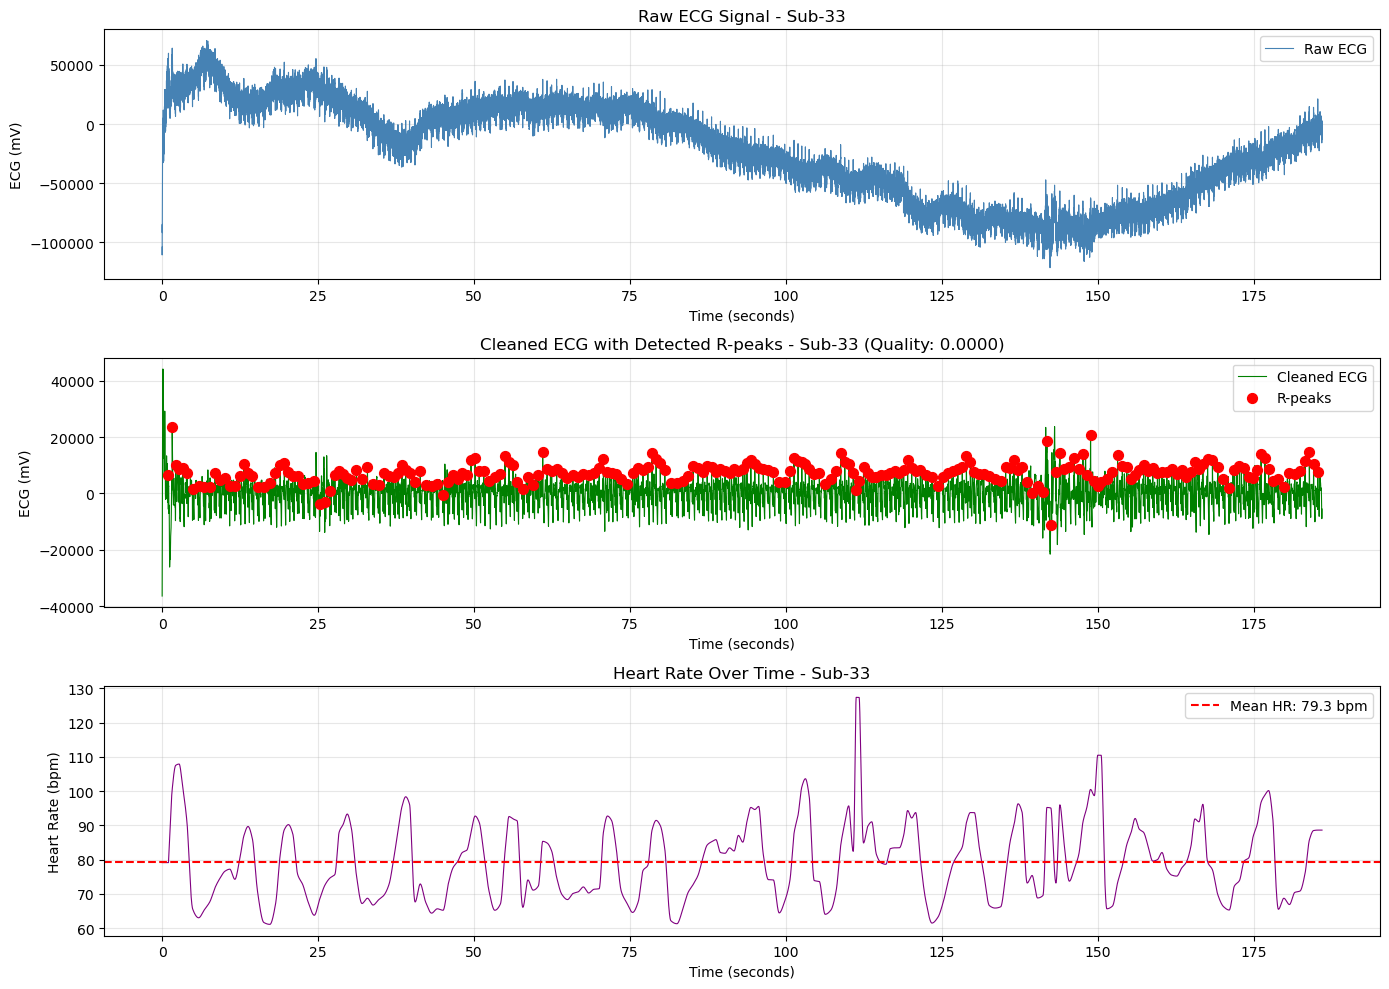


📊 Plot Summary for Sub-33:
  - Quality Score: 0.000000
  - R-peaks Found: 244
  - Mean HR: 79.3 bpm
  - HR Range: [61.1, 127.4] bpm


In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Create a comprehensive plot for the current subject
if 'ecg_signal' in locals():
    fig, axes = plt.subplots(3, 1, figsize=(14, 10))
    
    # Time axis in seconds
    time = np.arange(len(ecg_signal)) / sampling_rate
    
    # Plot 1: Raw ECG signal
    axes[0].plot(time, ecg_signal, label='Raw ECG', linewidth=0.8, color='steelblue')
    axes[0].set_xlabel('Time (seconds)')
    axes[0].set_ylabel('ECG (mV)')
    axes[0].set_title(f'Raw ECG Signal - Sub-{sub}')
    axes[0].grid(True, alpha=0.3)
    axes[0].legend()
    
    # Plot 2: Cleaned ECG with R-peaks
    axes[1].plot(time, ecg_cleaned, label='Cleaned ECG', linewidth=0.8, color='green')
    axes[1].scatter(time[rpeaks], ecg_cleaned[rpeaks], color='red', s=50, label='R-peaks', zorder=5)
    axes[1].set_xlabel('Time (seconds)')
    axes[1].set_ylabel('ECG (mV)')
    axes[1].set_title(f'Cleaned ECG with Detected R-peaks - Sub-{sub} (Quality: {quality_score:.4f})')
    axes[1].grid(True, alpha=0.3)
    axes[1].legend()
    
    # Plot 3: Heart Rate over time
    axes[2].plot(time, signals['ECG_Rate'], linewidth=0.8, color='purple')
    axes[2].set_xlabel('Time (seconds)')
    axes[2].set_ylabel('Heart Rate (bpm)')
    axes[2].set_title(f'Heart Rate Over Time - Sub-{sub}')
    axes[2].axhline(y=signals['ECG_Rate'].mean(), color='red', linestyle='--', label=f'Mean HR: {signals["ECG_Rate"].mean():.1f} bpm')
    axes[2].grid(True, alpha=0.3)
    axes[2].legend()
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n📊 Plot Summary for Sub-{sub}:")
    print(f"  - Quality Score: {quality_score:.6f}")
    print(f"  - R-peaks Found: {len(rpeaks)}")
    print(f"  - Mean HR: {signals['ECG_Rate'].mean():.1f} bpm")
    print(f"  - HR Range: [{signals['ECG_Rate'].min():.1f}, {signals['ECG_Rate'].max():.1f}] bpm")
else:
    print("❌ No subject data loaded. Run the previous cell first with a subject number.")

DIAGNOSTIC ANALYSIS: Why is quality 0.0?

1️⃣  R-PEAKS DETECTION
   Number of R-peaks: 244
   ✓ Sufficient R-peaks

2️⃣  RR-INTERVALS (distances between R-peaks)
   Intervals: [597 558 556 595 660 915 952 918 886 835 804 783 777 808 751 690 669 697
 853 973 982 896 739 676 665 685 793 826 890 941 876 827 804 793 682 664
 643 674 795 893 873 899 879 862 824 747 680 629 610 624 887 823 889 932
 914 920 824 773 755 731 725 682 647 660 731 848 920 895 731 648 653 657
 908 810 844 830 703 707 727 802 860 878 856 850 833 854 841 839 682 647
 656 715 848 891 929 887 781 766 677 656 667 722 965 979 918 853 825 795
 746 712 704 699 731 733 719 727 689 705 659 630 634 628 736 809 810 931
 884 814 684 645 593 579 609 812 815 937 919 845 714 662 627 728 471 471
 707 669 659 736 759 763 721 719 719 689 636 651 640 749 883 976 950 885
 810 760 737 717 661 640 640 710 789 901 911 906 795 705 664 623 639 820
 796 872 863 630 631 820 625 712 814 776 736 660 630 597 608 543 543 914
 903 819 767 711 683 

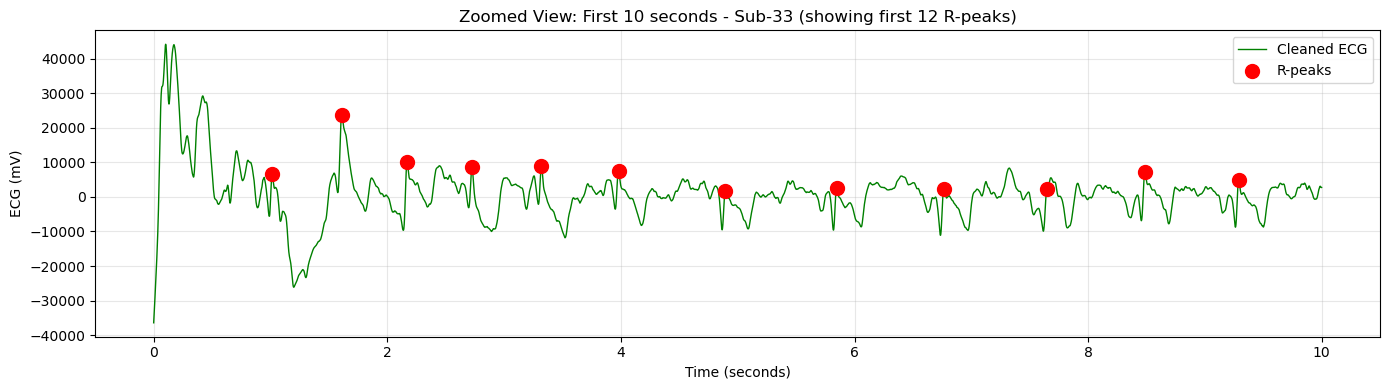


HYPOTHESIS:
✓ R-peaks seem reasonable. The 0.0 quality might be from:
   • Poor QRS delineation (Q and S peaks not detected)
   • Signal preprocessing removing important features
   • Specific issue with nk.ecg_quality() method='averageQRS'


In [6]:
import matplotlib.pyplot as plt
import numpy as np

print("DIAGNOSTIC ANALYSIS: Why is quality 0.0?")
print("="*80)

if 'ecg_signal' in locals() and 'rpeaks' in locals():
    
    # Check 1: R-peaks count
    print(f"\n1️⃣  R-PEAKS DETECTION")
    print(f"   Number of R-peaks: {len(rpeaks)}")
    if len(rpeaks) < 2:
        print(f"   ⚠️  PROBLEM: Need at least 2 R-peaks for quality calculation!")
    else:
        print(f"   ✓ Sufficient R-peaks")
    
    # Check 2: R-peak intervals (RR intervals)
    if len(rpeaks) >= 2:
        rr_intervals = np.diff(rpeaks)
        print(f"\n2️⃣  RR-INTERVALS (distances between R-peaks)")
        print(f"   Intervals: {rr_intervals}")
        print(f"   Mean interval: {rr_intervals.mean():.2f} samples")
        print(f"   Std dev: {rr_intervals.std():.6f} samples")
        print(f"   Min: {rr_intervals.min()}, Max: {rr_intervals.max()}")
        
        if rr_intervals.std() == 0:
            print(f"   ⚠️  PROBLEM: All RR intervals are IDENTICAL! (std=0)")
            print(f"      This causes quality=0 because there's no variation")
        else:
            print(f"   ✓ RR intervals have variation")
    
    # Check 3: QRS delineation (from nk.ecg_process)
    if 'info' in locals():
        print(f"\n3️⃣  QRS DELINEATION")
        if 'ECG_P_Onsets' in info and 'ECG_P_Offsets' in info:
            p_onsets = info['ECG_P_Onsets']
            p_offsets = info['ECG_P_Offsets']
            print(f"   P-wave onsets: {len(p_onsets)} detected")
            print(f"   P-wave offsets: {len(p_offsets)} detected")
        
        if 'ECG_Q_Peaks' in info:
            q_peaks = info['ECG_Q_Peaks']
            print(f"   Q peaks: {len(q_peaks) if q_peaks is not None else 0}")
        if 'ECG_S_Peaks' in info:
            s_peaks = info['ECG_S_Peaks']
            print(f"   S peaks: {len(s_peaks) if s_peaks is not None else 0}")
    
    # Check 4: Signal quality metrics
    print(f"\n4️⃣  SIGNAL QUALITY")
    print(f"   Raw signal - Min: {ecg_signal.min():.4f}, Max: {ecg_signal.max():.4f}")
    print(f"   Cleaned signal - Min: {ecg_cleaned.min():.4f}, Max: {ecg_cleaned.max():.4f}")
    print(f"   Signal range: {ecg_cleaned.max() - ecg_cleaned.min():.4f}")
    print(f"   Signal variance: {ecg_cleaned.var():.6f}")
    
    if ecg_cleaned.var() < 0.001:
        print(f"   ⚠️  PROBLEM: Signal has very low variance (nearly flat)")
    
    # Check 5: Visual inspection with zoomed plot
    print(f"\n5️⃣  ZOOMED VIEW OF FIRST 10 SECONDS")
    zoom_samples = min(10 * sampling_rate, len(ecg_cleaned))
    
    fig, ax = plt.subplots(figsize=(14, 4))
    time_zoom = np.arange(zoom_samples) / sampling_rate
    ax.plot(time_zoom, ecg_cleaned[:zoom_samples], linewidth=1, color='green', label='Cleaned ECG')
    
    # Mark R-peaks in this window
    rpeaks_in_zoom = rpeaks[rpeaks < zoom_samples]
    if len(rpeaks_in_zoom) > 0:
        ax.scatter(time_zoom[rpeaks_in_zoom], ecg_cleaned[rpeaks_in_zoom], color='red', s=100, label='R-peaks', zorder=5)
    
    ax.set_xlabel('Time (seconds)')
    ax.set_ylabel('ECG (mV)')
    ax.set_title(f'Zoomed View: First 10 seconds - Sub-{sub} (showing first {len(rpeaks_in_zoom)} R-peaks)')
    ax.grid(True, alpha=0.3)
    ax.legend()
    plt.tight_layout()
    plt.show()
    
    print("\n" + "="*80)
    print("HYPOTHESIS:")
    if len(rpeaks) < 2:
        print("❌ Not enough R-peaks detected - this is the problem")
    elif rr_intervals.std() == 0:
        print("❌ Perfect regularity in R-peaks (no variation) - quality calculation returns 0")
        print("   This could indicate:")
        print("   • Synthetic/fake signal")
        print("   • Noise being mistaken for consistent peaks")
        print("   • Data corruption")
    else:
        print("✓ R-peaks seem reasonable. The 0.0 quality might be from:")
        print("   • Poor QRS delineation (Q and S peaks not detected)")
        print("   • Signal preprocessing removing important features")
        print("   • Specific issue with nk.ecg_quality() method='averageQRS'")
    
else:
    print("❌ No subject data loaded. Run the single subject analysis cell first.")